<a href="https://colab.research.google.com/github/VinodhiniD-04/Lane-Line-Detection/blob/main/lane_line_detection_mv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from numpy.lib.function_base import average




In [8]:
!pip install opencv-python

In [10]:
def make_coordinates (image, line_parameters):
  slope, intercept = line_parameters
  print(image.shape)
  y1 = image.shape[0]
  y2 = int(y1*(3/5))
  x1 = int((y1-intercept)/slope)
  x2 = int((y2-intercept)/slope)
  return np.array([x1,y1,x2,y2])

In [11]:
def average_slope_intercrept(image,line):
  left_fit = []
  right_fit = []
  for line in lines:
    x1,y1,x2,y2 = line.reshape(4)
    parameters = np.polyfit((x1,x2),(y1,y2),1)
    print(parameters)
    slope = parameters[0]
    intercept = parameters[1]
    if slope < 0:
      left_fit.append((slope,intercept))
    else:
      right_fit.append((slope,intercept))
  left_fit_average = np.average(left_fit,axis=0)
  right_fit_average = np.average(right_fit,axis=0)
  left_line = make_coordinates(image,left_fit_average)
  right_line = make_coordinates(image,right_fit_average)
  return np.array([left_line, right_line])

In [12]:
def canny(image):
  hls = cv2.cvtColor(image,cv2.COLOR_BGR2HLS)
  blur = cv2.GaussianBlur(hls,(5,5),0)
  canny = cv2.Canny(blur,50,150)
  return canny

In [13]:
def display_lines (image,lines):
  line_image = np.zeros_like(image)
  if lines is not None:
    for line in lines:
      x1, y1, x2, y2 = line.reshape(4)
      cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
  return line_image


In [14]:
def region_of_interest(image):
  height = image.shape[0]
  polygons = np.array([[(0,height),(900,height),(500,260)]])
  mask = np.zeros_like(image)
  cv2.fillPoly(mask, polygons,255)
  masked_image = cv2.bitwise_and(image,mask)
  return masked_image

[ -0.67352185 626.57840617]
[ -0.6754386  631.88596491]
[ -0.7027027  647.62162162]
[ -0.72649573 660.4957265 ]
[ -0.67647059 625.97058824]
[  0.67326733 -24.06930693]
[ 0.59821429 22.59821429]
[ -0.72368421 653.72368421]
[  0.67549669 -25.37748344]
[ 0.64788732 -4.32394366]
[ 0.6509434  -6.27358491]
[ -0.8705036  706.25179856]
[ -0.75520833 672.046875  ]
[ -0.77419355 666.19354839]
[ -0.75714286 661.92857143]
[  0.65289256 -11.37190083]
[ -0.78301887 678.82075472]
[ -0.90265487 717.81415929]
[ -0.70048309 639.00483092]
[-3.50649351e-01  4.72714286e+02]
[ -0.6796875 650.828125 ]
(540, 960, 3)
(540, 960, 3)


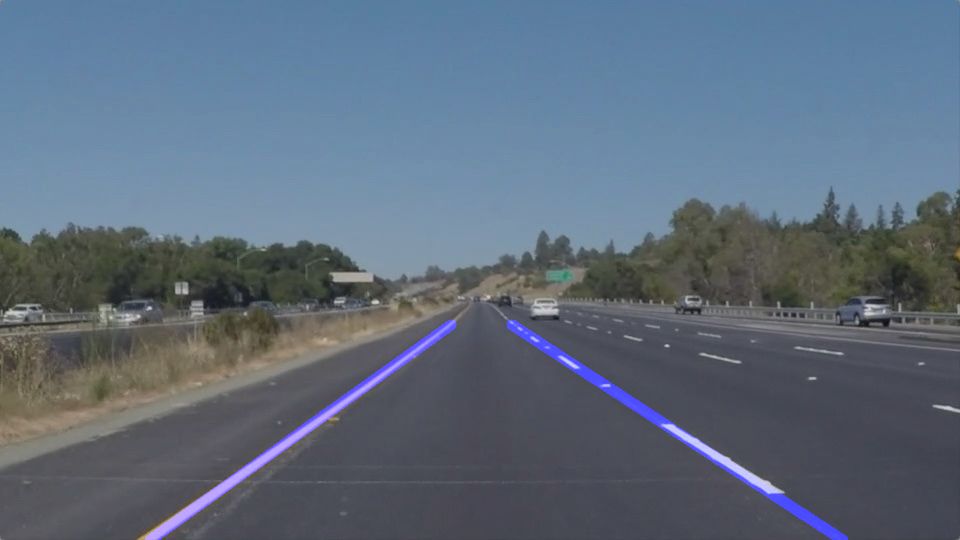

In [17]:
image= cv2.imread('solidYellowLeft.jpg')
lane_image = np.copy(image)
canny_image = canny(lane_image)
cropped_image = region_of_interest(canny_image)
rho = 2
theta = np.pi/180
threshold = 100
min_line_length = 40
max_line_gap = 30
lines = cv2.HoughLinesP(cropped_image, rho, theta, threshold, np.array([]),min_line_length, max_line_gap)
averaged_lines = average_slope_intercrept(lane_image,lines)
line_image = display_lines(lane_image, averaged_lines)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image,1,1)
cv2_imshow(combo_image)